# **Importing Modules and Libraries**

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

print("donee")

donee


# **Importing Datasets**

In [36]:
# data = pd.read_csv('/content/drive/MyDrive/IDS_Dataset/UNSW_NB15.csv')
data = pd.read_csv('datasets/UNSW_NB15.csv')

In [37]:
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [39]:
data[data['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175125,175126,0.653375,tcp,-,FIN,10,8,564,354,26.018748,...,1,1,0,0,0,18,1,0,Reconnaissance,1
175179,175180,0.695566,tcp,-,FIN,10,8,564,354,24.440528,...,1,1,0,0,0,3,1,0,Reconnaissance,1
175191,175192,0.962856,tcp,-,FIN,24,60,1256,59374,86.201883,...,1,1,0,0,0,1,1,0,Exploits,1
175277,175278,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,...,1,1,0,0,0,2,1,0,Exploits,1


In [40]:
data['service'].replace('-',np.nan,inplace=True)

In [41]:
data.isnull().sum()

id                       0
dur                      0
proto                    0
service              94168
state                    0
spkts                    0
dpkts                    0
sbytes                   0
dbytes                   0
rate                     0
sttl                     0
dttl                     0
sload                    0
dload                    0
sloss                    0
dloss                    0
sinpkt                   0
dinpkt                   0
sjit                     0
djit                     0
swin                     0
stcpb                    0
dtcpb                    0
dwin                     0
tcprtt                   0
synack                   0
ackdat                   0
smean                    0
dmean                    0
trans_depth              0
response_body_len        0
ct_srv_src               0
ct_state_ttl             0
ct_dst_ltm               0
ct_src_dport_ltm         0
ct_dst_sport_ltm         0
ct_dst_src_ltm           0
i

In [42]:
data.shape

(175341, 45)

In [43]:
data.dropna(inplace=True)

In [44]:
data.shape

(81173, 45)

In [45]:
data['attack_cat'].value_counts()

attack_cat
Generic           39496
Normal            19488
Exploits          16187
DoS                1791
Fuzzers            1731
Reconnaissance     1703
Analysis            564
Worms               114
Backdoor             99
Name: count, dtype: int64

In [46]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [47]:
#features = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15_features.csv')
features = pd.read_csv('datasets/UNSW_NB15_features.csv')

In [48]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [49]:
features['Type '] = features['Type '].str.lower()

In [50]:
# selecting column names of all data types
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [51]:
# selecting common column names from dataset and feature dataset
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [52]:
# Converting integer columns to numeric
for c in integer_names:
  pd.to_numeric(data[c])

In [53]:
# Converting binary columns to numeric
for c in binary_names:
  pd.to_numeric(data[c])

In [54]:
# Converting float columns to numeric
for c in float_names:
  pd.to_numeric(data[c])

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81173 entries, 3 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 81173 non-null  int64  
 1   dur                81173 non-null  float64
 2   proto              81173 non-null  object 
 3   service            81173 non-null  object 
 4   state              81173 non-null  object 
 5   spkts              81173 non-null  int64  
 6   dpkts              81173 non-null  int64  
 7   sbytes             81173 non-null  int64  
 8   dbytes             81173 non-null  int64  
 9   rate               81173 non-null  float64
 10  sttl               81173 non-null  int64  
 11  dttl               81173 non-null  int64  
 12  sload              81173 non-null  float64
 13  dload              81173 non-null  float64
 14  sloss              81173 non-null  int64  
 15  dloss              81173 non-null  int64  
 16  sinpkt             81173 n

In [56]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


# **One hot encoding**

In [57]:
num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [58]:
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head()

,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN


In [59]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [60]:
data_cat = data_cat.astype(int)

In [61]:
data_cat.head()

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
15,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
17,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
21,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [62]:
data.shape

(81173, 45)

In [63]:
data = pd.concat([data, data_cat],axis=1)

In [64]:
data.shape
cat_col
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,0,0,0,0,0,0,1,0,0,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,0,1,0,0,0,0,1,0,0,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,0,0,1,0,0,0,0,1,0,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,0,0,0,0,0,0,1,0,0,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,0,0,0,0,0,0,0,1,0,0
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,0,0,0,0,0,0,0,1,0,0
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,0,0,0,0,0,0,0,1,0,0
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,0,0,0,0,0,0,0,1,0,0


In [65]:
data.drop(columns=cat_col,inplace=True)

In [66]:
data.shape
data

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,0,0,0,0,0,0,1,0,0,0
11,12,2.093085,62,28,56329,2212,42.520967,62,252,2.118251e+05,...,0,1,0,0,0,0,1,0,0,0
15,16,0.000002,2,0,138,0,500000.001300,254,0,2.760000e+08,...,0,0,1,0,0,0,0,1,0,0
17,18,0.393556,10,8,860,1096,43.195886,62,252,1.573347e+04,...,0,0,0,0,0,0,1,0,0,0
21,22,0.338017,10,6,998,268,44.376468,254,252,2.127704e+04,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,2,0,114,0,166666.660800,254,0,7.600000e+07,...,0,0,0,0,0,0,0,1,0,0
175336,175337,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,0,0,0,0,0,0,0,1,0,0
175338,175339,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,0,0,0,0,0,0,0,1,0,0
175339,175340,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,0,0,0,0,0,0,0,1,0,0


# **Data Normalization**


In [67]:
# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_RST']


In [68]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [69]:
# data before normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,0,0,0,0,0,0,1,0,0,0
11,12,2.093085,62,28,56329,2212,42.520967,62,252,2.118251e+05,...,0,1,0,0,0,0,1,0,0,0
15,16,0.000002,2,0,138,0,500000.001300,254,0,2.760000e+08,...,0,0,1,0,0,0,0,1,0,0
17,18,0.393556,10,8,860,1096,43.195886,62,252,1.573347e+04,...,0,0,0,0,0,0,1,0,0,0
21,22,0.338017,10,6,998,268,44.376468,254,252,2.127704e+04,...,0,0,0,0,0,0,1,0,0,0


In [70]:
# calling normalization() function
data = normalization(data.copy(),num_col)

In [71]:
# data after normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,2.802780e-02,0.001144,0.001093,0.000041,0.000053,0.000014,0.138393,0.992126,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,12,3.488529e-02,0.006344,0.002551,0.004337,0.000151,0.000043,0.138393,0.992126,0.000092,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15,16,1.666693e-08,0.000104,0.000000,0.000003,0.000000,0.500000,0.995536,0.000000,0.119792,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,18,6.559354e-03,0.000936,0.000729,0.000059,0.000075,0.000043,0.138393,0.992126,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21,22,5.633690e-03,0.000936,0.000547,0.000069,0.000018,0.000044,0.995536,0.992126,0.000009,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# **Label Encoding**

In [72]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x==0 else 'abnormal'))

In [73]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [74]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

In [75]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [76]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

# **Correlation between features of dataset**

In [77]:
num_col.append('label')

Text(0.5, 1.0, 'Correlation Matrix for Binary Labels')

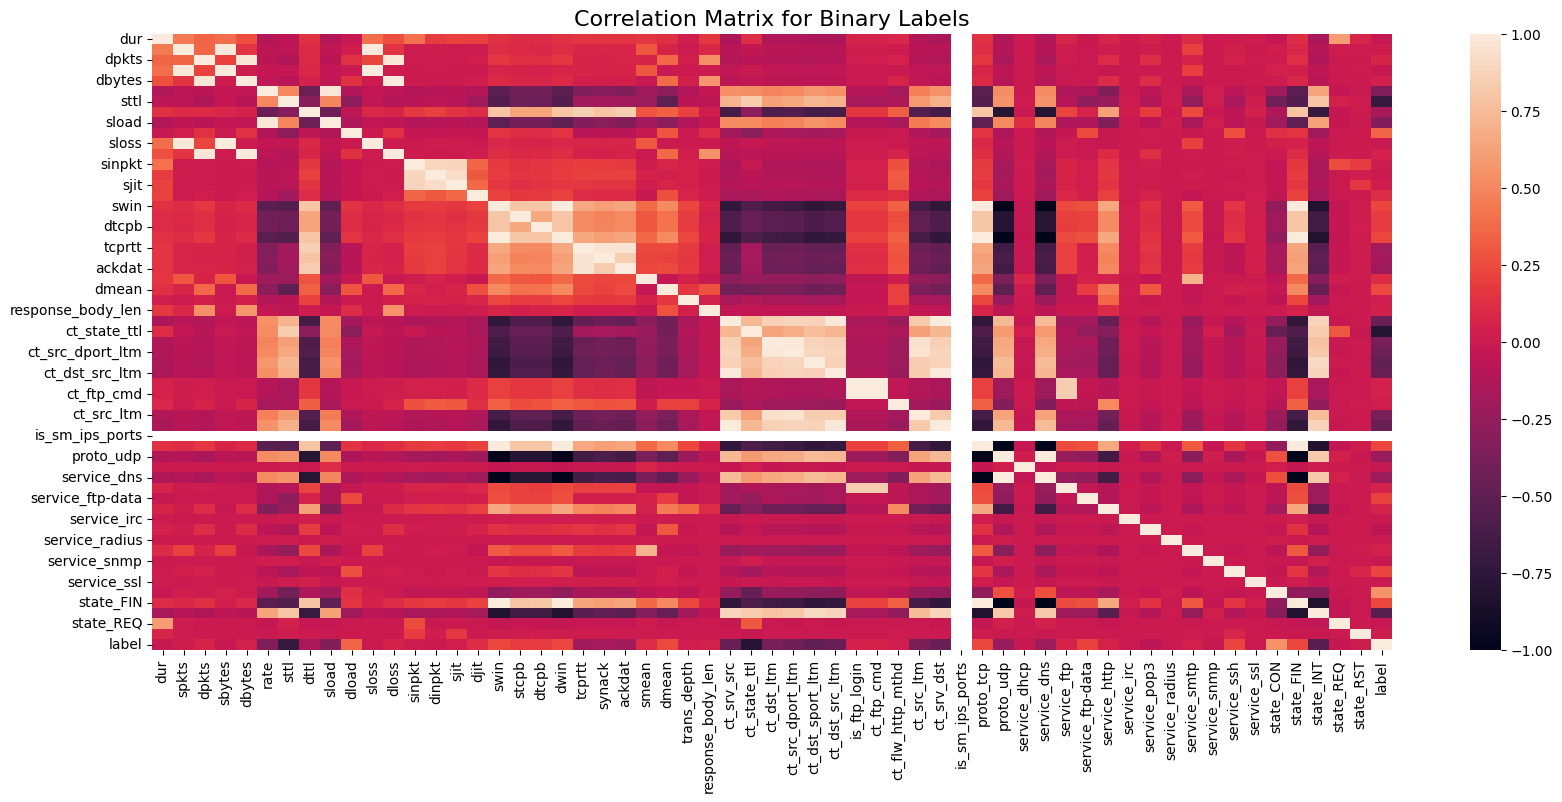

In [78]:
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)



# **Feature Selection**

## **Binary Labels**

In [79]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.5]
highest_corr_bin_sorted = highest_corr_bin.sort_values(ascending=True)
highest_corr_bin_sorted

state_INT       0.546631
state_CON       0.552505
sttl            0.707337
ct_state_ttl    0.801403
label           1.000000
Name: label, dtype: float64

In [80]:
# selecting attributes found
bin_cols = highest_corr_bin_sorted.index
bin_cols

Index(['state_INT', 'state_CON', 'sttl', 'ct_state_ttl', 'label'], dtype='object')

In [81]:
# Binary labelled Dataset
bin_data = bin_data[bin_cols].copy()
bin_data

,state_INT,state_CON,sttl,ct_state_ttl,label
3,0.0,0.0,0.138393,0.166667,1
11,0.0,0.0,0.138393,0.166667,1
15,1.0,0.0,0.995536,0.333333,1
17,0.0,0.0,0.138393,0.166667,1
21,0.0,0.0,0.995536,0.166667,1
...,...,...,...,...,...
175335,1.0,0.0,0.995536,0.333333,0
175336,1.0,0.0,0.995536,0.333333,0
175338,1.0,0.0,0.995536,0.333333,0
175339,1.0,0.0,0.995536,0.333333,0


### **Resampling to 1000 datapoints**

In [82]:
from imblearn.under_sampling import RandomUnderSampler
X = bin_data.drop('label', axis=1)  # Features
y = bin_data['label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
undersampler = RandomUnderSampler(sampling_strategy={0: 700, 1: 300})
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['label'])], axis=1)
resampled_data

,state_INT,state_CON,sttl,ct_state_ttl,label
0,1.0,0.0,0.995536,0.333333,0
1,1.0,0.0,0.995536,0.333333,0
2,1.0,0.0,0.995536,0.333333,0
3,0.0,0.0,0.138393,0.166667,0
4,1.0,0.0,0.995536,0.333333,0
...,...,...,...,...,...
995,0.0,1.0,0.000000,0.000000,1
996,0.0,0.0,0.000000,0.000000,1
997,0.0,0.0,0.000000,0.000000,1
998,0.0,0.0,0.000000,0.000000,1


### **Saving Prepared Dataset to Disk**

In [83]:
resampled_data.to_csv('./final_dataset_IDS.csv')

# **Classical Machine Learning**

## **Data Splitting**



In [84]:
bin_data = pd.read_csv('./datasets/final_dataset_IDS.csv')
bin_data.drop(bin_data.columns[0], axis=1, inplace=True)
bin_data

,state_INT,state_CON,sttl,ct_state_ttl,label
0,1,0,0.995536,0.333333,0
1,0,0,0.995536,0.166667,0
2,0,0,0.138393,0.166667,0
3,0,0,0.995536,1.000000,0
4,1,0,0.995536,0.333333,0
...,...,...,...,...,...
995,0,1,0.000000,0.000000,1
996,0,1,0.000000,0.000000,1
997,0,0,0.000000,0.000000,1
998,0,1,0.000000,0.000000,1


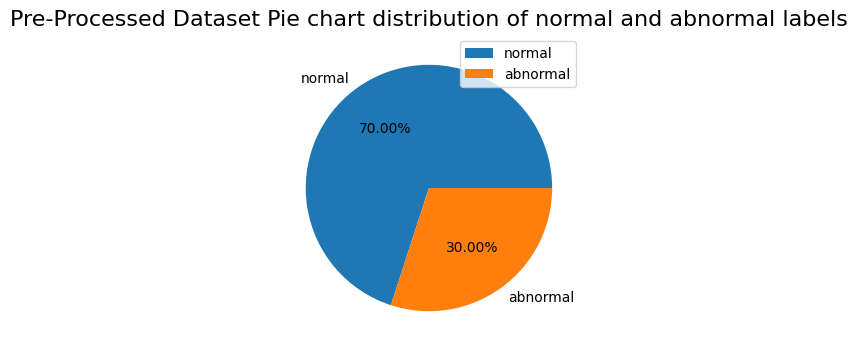

In [85]:
plt.figure(figsize=(4,4))
plt.pie(bin_data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pre-Processed Dataset Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.show()

In [86]:
X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

## **Random Forest Classifier**

In [88]:
 rf_bin = RandomForestClassifier(random_state=123)
 rf_bin.fit(X_train,y_train)

RandomForestClassifier(random_state=123)

In [89]:
import time
start = time.time()

y_pred = rf_bin.predict(X_test)

elapsed = time.time() - start

print(f"Training time: {elapsed} seconds")
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Training time: 0.015275239944458008 seconds
Accuracy -  96.5


In [90]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.035
Mean Squared Error -  0.035
Root Mean Squared Error -  0.18708286933869708
Accuracy -  96.5


In [91]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.95      1.00      0.97       133
      normal       1.00      0.90      0.94        67

    accuracy                           0.96       200
   macro avg       0.97      0.95      0.96       200
weighted avg       0.97      0.96      0.96       200



Classical RandomForestClassifier confusion matrix


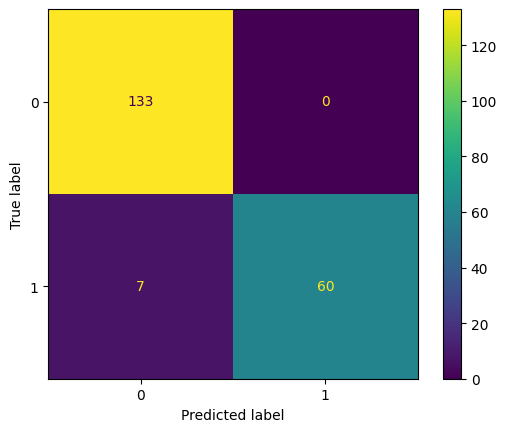

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=rf_bin.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_bin.classes_)
print('Classical RandomForestClassifier confusion matrix')
disp.plot()
plt.show()

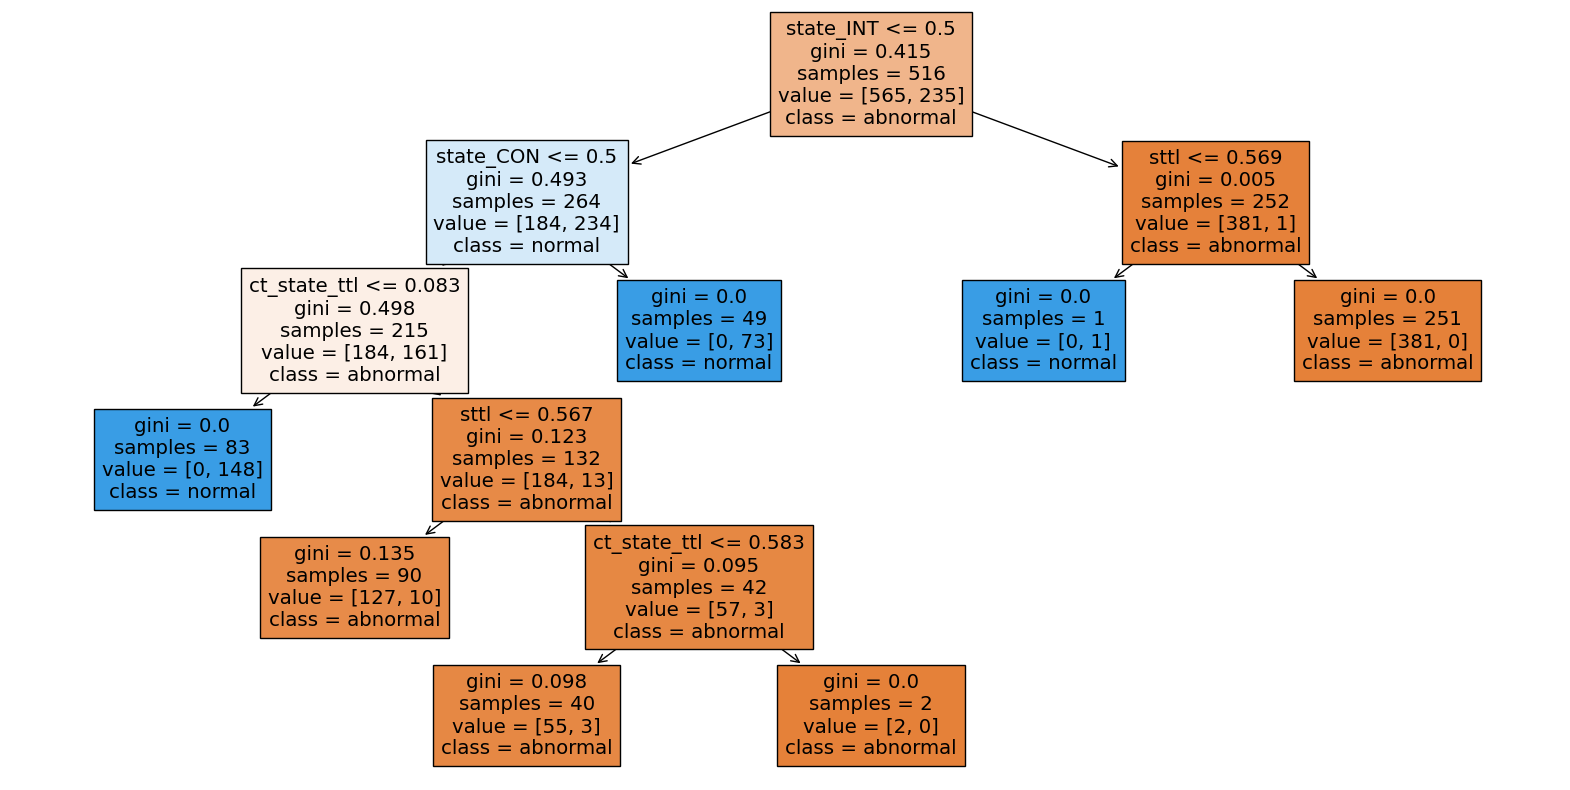

In [93]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Accessing the first tree in the Random Forest
first_tree = rf_bin.estimators_[0]

# Plotting the first tree
plt.figure(figsize=(20,10))
plot_tree(first_tree, filled=True, feature_names=X_train.columns, class_names=le1.classes_ ,max_depth=5)
plt.show()


### **Saving Trained Model to Disk**

In [94]:
pkl_filename = "random_forest_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


# **Linear Support Vector Machine**

In [95]:
lsvm_bin = SVC(kernel='linear',gamma='auto')
lsvm_bin.fit(X_train,y_train)

SVC(gamma='auto', kernel='linear')

In [96]:
import time
start = time.time()

y_pred = lsvm_bin.predict(X_test)

elapsed = time.time() - start

print(f"Training time: {elapsed} seconds")
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Training time: 0.0047838687896728516 seconds
Accuracy -  96.5


In [97]:

print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.035
Mean Squared Error -  0.035
Root Mean Squared Error -  0.18708286933869708
Accuracy -  96.5


In [98]:

cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.95      1.00      0.97       133
      normal       1.00      0.90      0.94        67

    accuracy                           0.96       200
   macro avg       0.97      0.95      0.96       200
weighted avg       0.97      0.96      0.96       200



Classical SVM confusion matrix


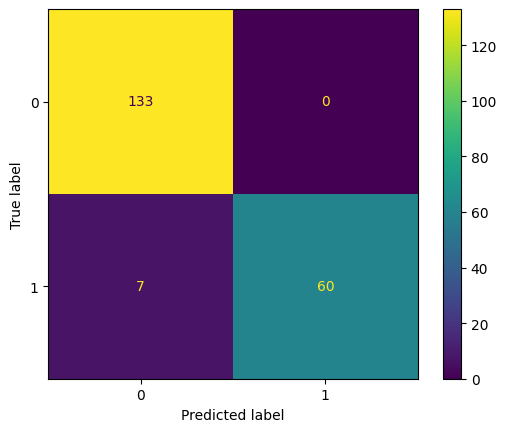

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=lsvm_bin.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lsvm_bin.classes_)
print('Classical SVM confusion matrix')
disp.plot()
plt.show()